<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/neural_network_regression_with_tensorflow_exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Neural network regression with TensorFlow Exercises

In [1]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

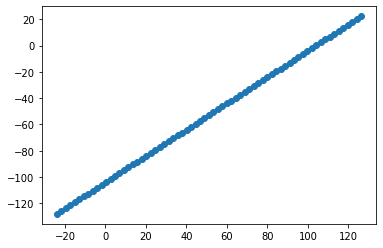

In [6]:
# Creating Features
X = np.arange(-24,128,2.21)

# Creating Labels
y = np.arange(-128,24,2.21)

# Visulizing
plt.scatter(X, y)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.
